In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def name_dataset(df, name):
    df['dataset'] = name
    return df

def plot_num_iterations_vs_output(df, output_var, num_mutants_per_round):
    # Filter the DataFrame based on num_mutants_per_round
    filtered_df = df[df['num_mutants_per_round'] == num_mutants_per_round]

    # Get unique datasets from the DataFrame
    datasets = filtered_df['dataset'].unique()

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Create a color map for datasets
    color_map = plt.get_cmap('tab20')

    # Plot each dataset as a separate line
    for i, dataset in enumerate(datasets):
        dataset_df = filtered_df[filtered_df['dataset'] == dataset]
        x_values = dataset_df['num_iterations']
        y_values = dataset_df[output_var]
        color = color_map(i)
        label = f'{dataset}'
        ax.plot(x_values, y_values, color=color, marker='o', label=label)

    # Set plot labels and title
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel(output_var)
    ax.set_title(f'{output_var} vs. Number of Iterations (num_mutants_per_round={num_mutants_per_round}), esm1b')

    # Add legend to the right side of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()

In [2]:
file_names_list = ["kelsic", "brenan", "stiffler", "markin", "giacomelli", "jones",  "haddox", "doud", "lee"]
scaled_dfs = []

for file_name in file_names_list:
    # Read the file
    file_path = file_name + "_esm1b_t33_650M_UR50S_results.csv"
    print(file_path)
    df = pd.read_csv(file_path)

    # Print the number of rows in the dataframe
    print("Number of rows in the dataframe:", len(df))
    
    # Scale the columns
    df_scaled = name_dataset(df, file_name)

    # Save the scaled dataframe in the list
    scaled_dfs.append(df_scaled)

# Concatenate all the scaled dataframes
df = pd.concat(scaled_dfs)

kelsic_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
brenan_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
stiffler_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
markin_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
giacomelli_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
jones_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
haddox_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
doud_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10
lee_esm1b_t33_650M_UR50S_results.csv
Number of rows in the dataframe: 10


In [3]:
df

,num_iterations,measured_var,learning_strategy,num_mutants_per_round,embedding_type,regression_type,first_median_fitness_scaled,first_top_fitness_scaled,first_fitness_binary_percentage,last_top_fitness_scaled,last_median_fitness_scaled,last_fitness_binary_percentage,change_median_fitness_scaled,change_top_fitness_scaled,change_fitness_binary_percentage,dataset
0,2,fitness,top10,16,embeddings,randomforest,0.894872,0.936646,0.517647,0.936646,0.894872,0.517647,0.000000,0.000000,0.000000,kelsic
1,3,fitness,top10,16,embeddings,randomforest,0.895043,0.930693,0.517647,0.938999,0.908550,0.729412,0.013507,0.008306,0.211765,kelsic
2,4,fitness,top10,16,embeddings,randomforest,0.899896,0.938247,0.576471,0.939567,0.909974,0.794118,0.010078,0.001320,0.217647,kelsic
3,5,fitness,top10,16,embeddings,randomforest,0.897482,0.934385,0.535294,0.948331,0.912291,0.976471,0.014809,0.013947,0.441176,kelsic
4,6,fitness,top10,16,embeddings,randomforest,0.896272,0.928530,0.494118,0.946082,0.915921,0.982353,0.019649,0.017553,0.488235,kelsic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,7,fitness,top10,16,embeddings,randomforest,0.015769,0.216940,0.123529,0.296672,0.017827,0.235294,0.002058,0.079731,0.111765,lee
6,8,fitness,top10,16,embeddings,randomforest,0.007722,0.187774,0.041176,0.311596,0.040284,0.252941,0.032562,0.123821,0.211765,lee
7,9,fitness,top10,16,embeddings,randomforest,0.009611,0.184393,0.111765,0.288889,0.041398,0.270588,0.031788,0.104496,0.158824,lee
8,10,fitness,top10,16,embeddings,randomforest,0.009526,0.217353,0.076471,0.327730,0.052119,0.323529,0.042593,0.110377,0.247059,lee


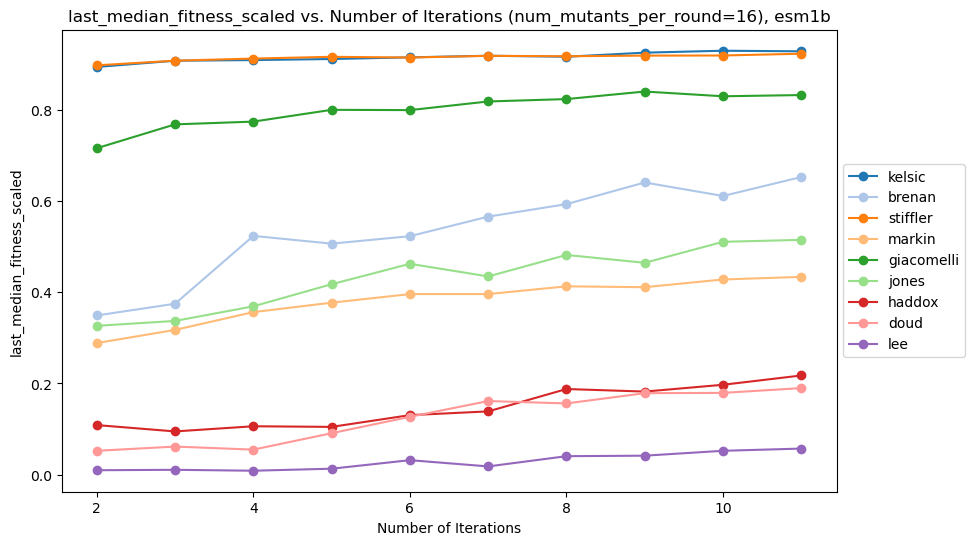

In [4]:
plot_num_iterations_vs_output(df, 'last_median_fitness_scaled', num_mutants_per_round=16)

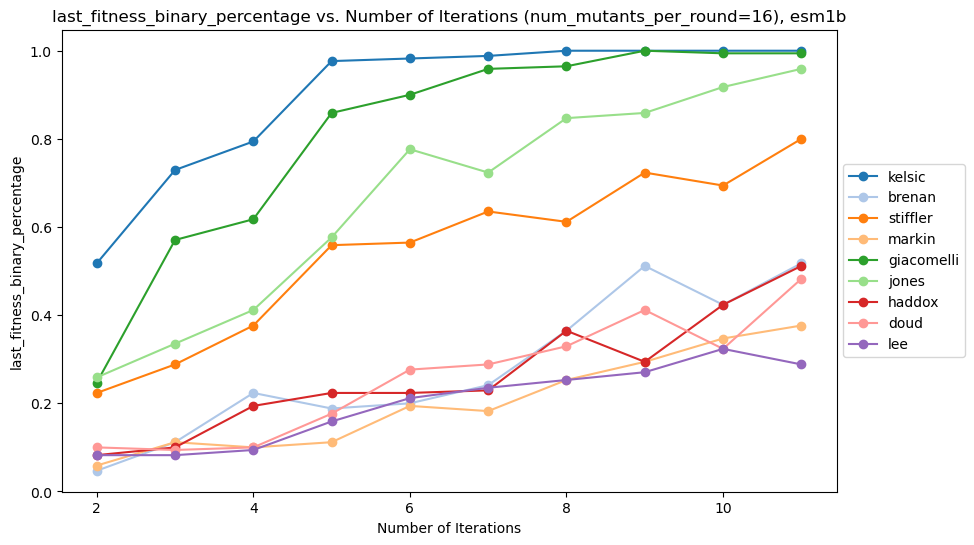

In [5]:
plot_num_iterations_vs_output(df, 'last_fitness_binary_percentage', num_mutants_per_round=16)

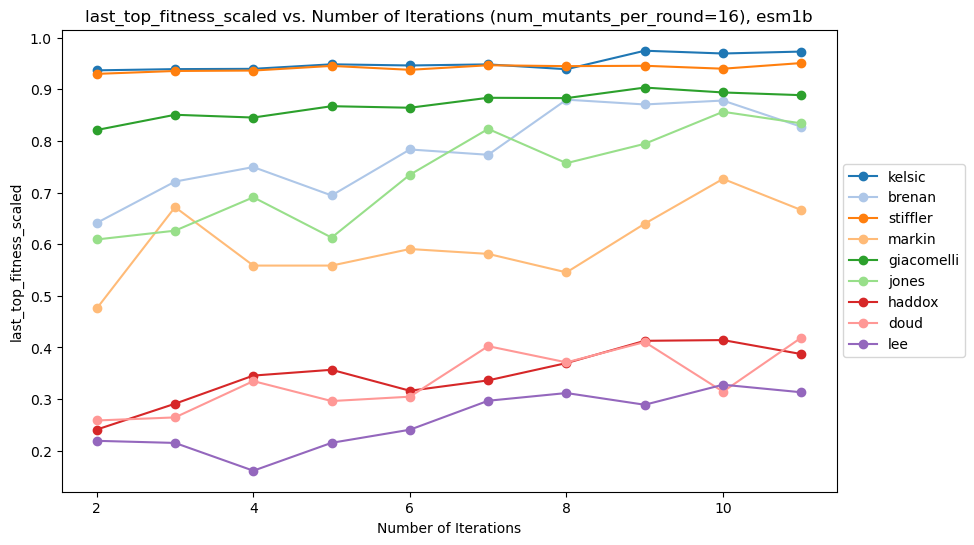

In [6]:
plot_num_iterations_vs_output(df, 'last_top_fitness_scaled', num_mutants_per_round=16)